In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [4]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [6]:
RANDOM_SEED = 666

In [7]:
housing_data = pd.read_csv("../../2/data/train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature Engineering

## Standardization / Normalization

In [22]:
X = housing_data[["1stFlrSF"]]

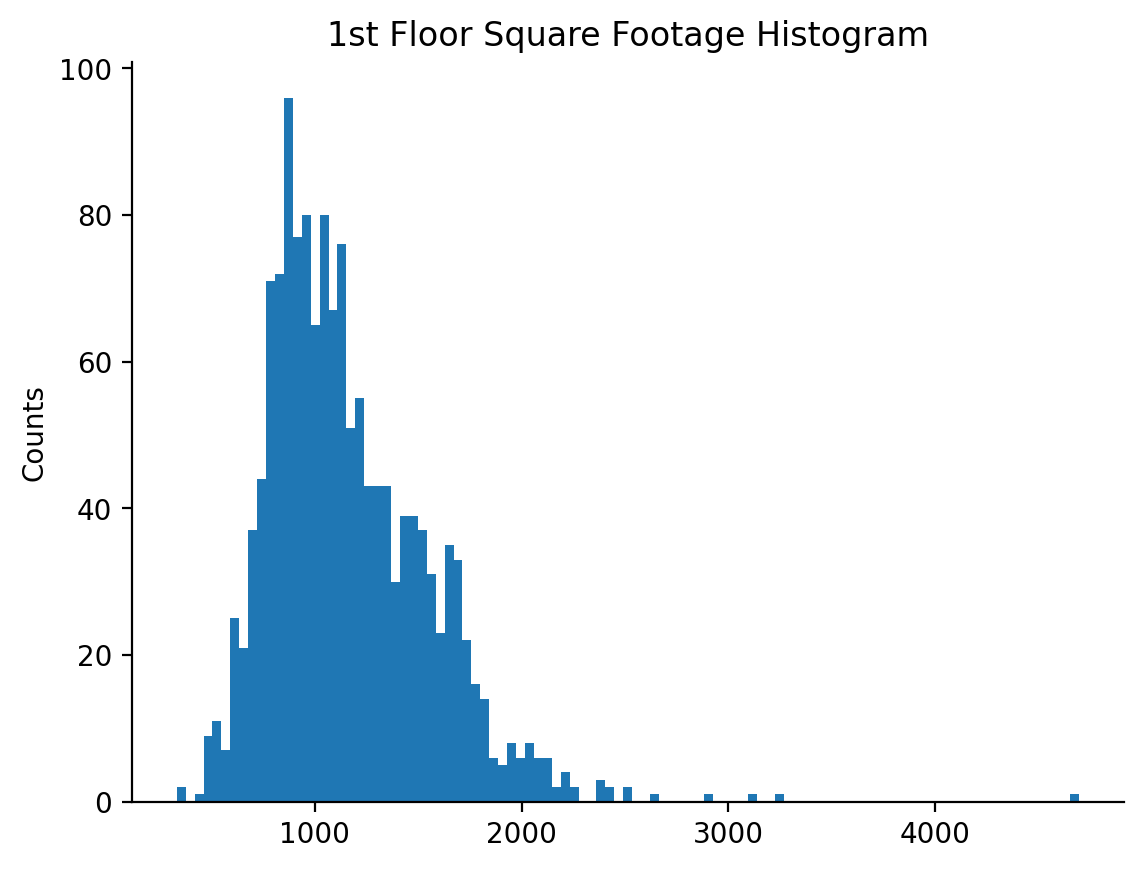

In [9]:
fig, ax = plt.subplots()
ax.hist(X, bins=101)
ax.set_title("1st Floor Square Footage Histogram")
ax.set_ylabel("Counts")
None

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler = scaler.fit(X)

In [12]:
print(f"Mean = {scaler.mean_}, Variance = {scaler.var_}")

Mean = [1162.62671233], Variance = [149347.71613577]


In [13]:
X_trans = scaler.transform(X)

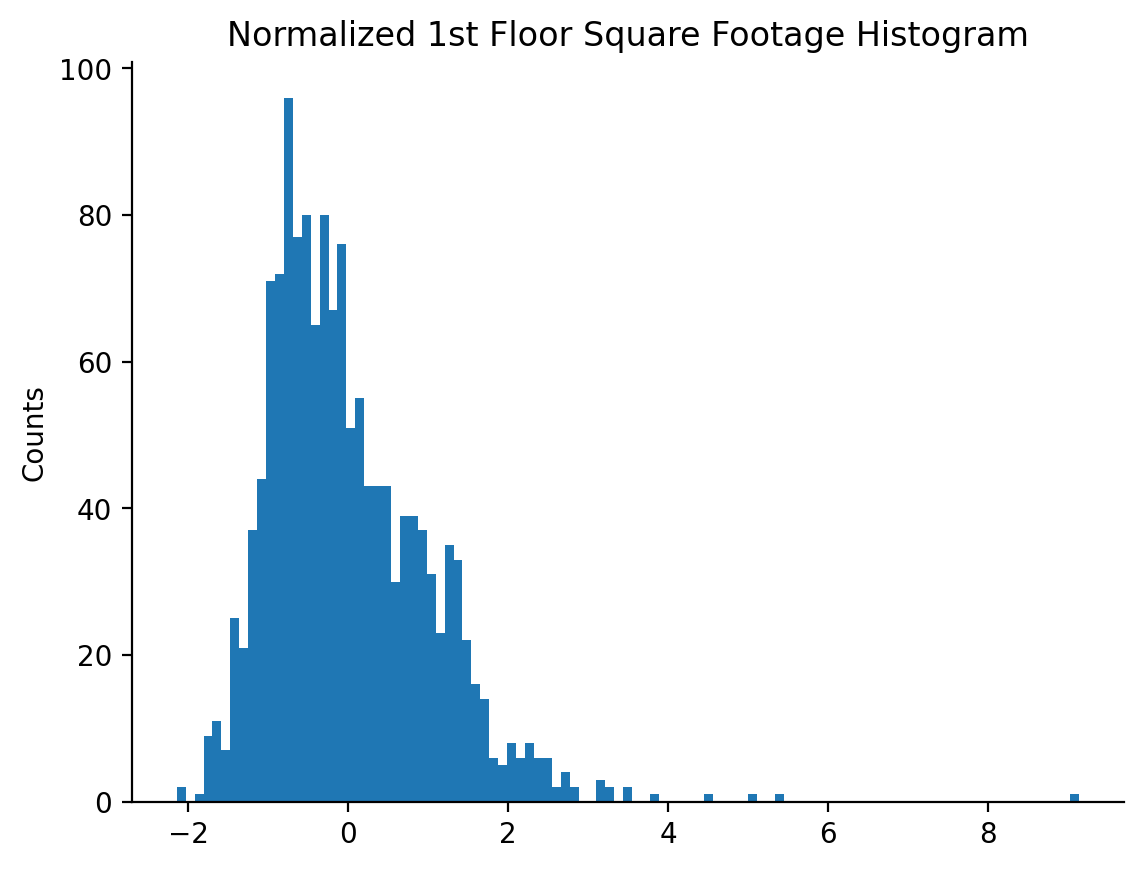

In [14]:
fig, ax = plt.subplots()
ax.hist(X_trans, bins=101)
ax.set_title("Normalized 1st Floor Square Footage Histogram")
ax.set_ylabel("Counts")
None

### PowerTransformer for Gaussian-ifying Data

In [15]:
from sklearn.preprocessing import PowerTransformer

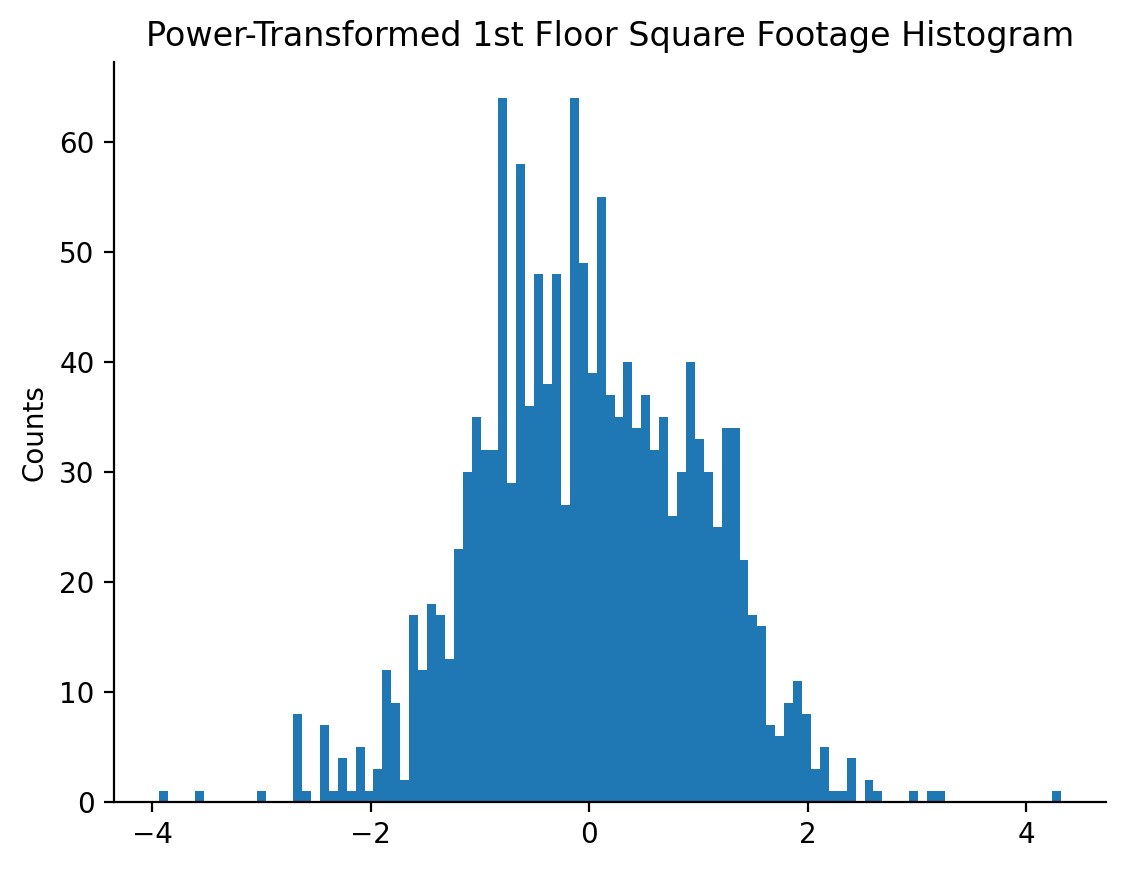

In [16]:
scaler = PowerTransformer()
scaler = scaler.fit(X)
X_trans = scaler.transform(X)
fig, ax = plt.subplots()
ax.hist(X_trans, bins=101)
ax.set_title("Power-Transformed 1st Floor Square Footage Histogram")
ax.set_ylabel("Counts")
None

# String Features

## Ordinal Encoding

```
ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

In [49]:
X = housing_data[["ExterCond"]]
X

,ExterCond
0,TA
1,TA
2,TA
3,TA
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,TA


In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
categories = ["Po", "Fa", "TA", "Gd", "Ex"]
ordinal_encoder = OrdinalEncoder(categories=[categories])

In [26]:
ordinal_encoder = ordinal_encoder.fit(X)

ValueError: invalid literal for int() with base 10: 'Po'

In [53]:
ordinal_encoder.categories_

[array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object)]

In [54]:
X_trans = ordinal_encoder.transform(X)
X_trans

array([[2.],
       [2.],
       [2.],
       ...,
       [3.],
       [2.],
       [2.]])

In [55]:
ordinal_encoder.inverse_transform(X_trans)

array([['TA'],
       ['TA'],
       ['TA'],
       ...,
       ['Gd'],
       ['TA'],
       ['TA']], dtype=object)

## One Hot Encoding

```
Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood
```

In [30]:
X = housing_data[["Foundation"]]
X

,Foundation
0,PConc
1,CBlock
2,PConc
3,BrkTil
4,PConc
...,...
1455,PConc
1456,CBlock
1457,Stone
1458,CBlock


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
one_hot_encoder = OneHotEncoder(categories="auto")
X_trans = one_hot_encoder.fit_transform(X)
X_trans

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1460 stored elements and shape (1460, 6)>

In [33]:
one_hot_encoder.categories_

[array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)]

In [34]:
one_hot_encoder.inverse_transform(X_trans)

array([['PConc'],
       ['CBlock'],
       ['PConc'],
       ...,
       ['Stone'],
       ['CBlock'],
       ['CBlock']], dtype=object)

You can also hack this in pandas

In [35]:
pd.get_dummies(X)

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1455,0,0,1,0,0,0
1456,0,1,0,0,0,0
1457,0,0,0,0,1,0
1458,0,1,0,0,0,0


## Multiple Columns

In [36]:
X = housing_data[["Foundation", "SaleCondition", "HouseStyle"]]
X

,Foundation,SaleCondition,HouseStyle
0,PConc,Normal,2Story
1,CBlock,Normal,1Story
2,PConc,Normal,2Story
3,BrkTil,Abnorml,2Story
4,PConc,Normal,2Story
...,...,...,...
1455,PConc,Normal,2Story
1456,CBlock,Normal,1Story
1457,Stone,Normal,2Story
1458,CBlock,Normal,1Story


In [39]:
one_hot_encoder = OneHotEncoder(categories="auto")
X_trans = one_hot_encoder.fit_transform(X)
X_trans

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4380 stored elements and shape (1460, 20)>

In [40]:
one_hot_encoder.categories_

[array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object),
 array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
        'SFoyer', 'SLvl'], dtype=object)]

In [ ]:
one_hot_encoder.inverse_transform(one_hot_encoder.fit_transform(X_trans))

# Model Selection

## Train/Test Split

In [ ]:
print(f"Full Dataset: {len(housing_data)} samples")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
TEST_SIZE = 0.30
train, test = train_test_split(
    housing_data, test_size=TEST_SIZE, random_state=RANDOM_SEED
)

In [ ]:
print(f"Train Dataset: {len(train):,} samples ({len(train) / len(housing_data):.0%})")
print(f"Test Dataset: {len(test)} samples ({len(test) / len(housing_data):.0%})")

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
def get_X_y(housing_data):
    target = "SalePrice"
    features = []
    for col in housing_data.columns:
        if col == target:
            continue
        if housing_data[col].dtype in (np.dtype("int64"), np.dtype("float64")):
            features.append(col)

    X = housing_data[features].copy()
    y = housing_data[target].copy()
    return X, y

In [ ]:
X_train, y_train = get_X_y(train)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer()
X_train_trans = imputer.fit_transform(X_train)

In [ ]:
model.fit(X_train_trans, y_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_train_pred = model.predict(X_train_trans)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R^2 = {r2_train:.3}")

In [ ]:
X_test, y_test = get_X_y(test)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
X_test_trans = imputer.transform(X_test)

In [ ]:
y_test_pred = model.predict(X_test_trans)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R^2 = {r2_test:.3}")

## Regularization

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
def fit_and_evaluate_model(model, train, test):
    X_train, y_train = get_X_y(train)
    X_test, y_test = get_X_y(test)

    imputer = SimpleImputer()
    X_train_trans = imputer.fit_transform(X_train)
    model.fit(X_train_trans, y_train)

    y_train_pred = model.predict(X_train_trans)
    y_test_pred = model.predict(imputer.transform(X_test))

    return r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

In [ ]:
r2_train, r2_test = fit_and_evaluate_model(
    Ridge(alpha=1_000, random_state=RANDOM_SEED), train, test
)

In [ ]:
print(f"Train R^2 = {r2_train:.3}")
print(f"Test R^2 = {r2_test:.3}")

In [ ]:
def fit_and_evaluate_model_with_scaling(model, train, test):
    X_train, y_train = get_X_y(train)
    X_test, y_test = get_X_y(test)

    # Let's also scale the data first!
    scaler = StandardScaler()
    X_train_trans = scaler.fit_transform(X_train)

    imputer = SimpleImputer()
    X_train_trans = imputer.fit_transform(X_train_trans)

    model.fit(X_train_trans, y_train)

    y_train_pred = model.predict(X_train_trans)
    y_test_pred = model.predict(imputer.transform(scaler.transform(X_test)))

    return r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

In [ ]:
r2_train, r2_test = fit_and_evaluate_model_with_scaling(
    Ridge(alpha=1_000, random_state=RANDOM_SEED), train, test
)
print(f"Train R^2 = {r2_train:.3}")
print(f"Test R^2 = {r2_test:.3}")

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
splitter = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [ ]:
fold = 1
for train_index, val_index in splitter.split(train):
    print(f"Fold {fold}:")
    print(
        f"\tTrain Dataset: {len(train_index):,} samples ({len(train_index) / len(train):.0%})"
    )
    print(
        f"\tVal Dataset: {len(val_index)} samples ({len(val_index) / len(train):.0%})"
    )
    fold += 1

In [ ]:
print(val_index)

In [ ]:
r2_trains = []
r2_vals = []
fold = 1
for train_index, val_index in splitter.split(train):
    r2_train, r2_val = fit_and_evaluate_model_with_scaling(
        Ridge(alpha=1_000, random_state=RANDOM_SEED),
        train.iloc[train_index],
        train.iloc[val_index],
    )

    r2_trains.append(r2_train)
    r2_vals.append(r2_val)

    fold += 1

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1, 6), r2_trains, "o--", label="Training")
ax.plot(range(1, 6), r2_vals, "o--", label="Validation")
ax.legend(title="Dataset", bbox_to_anchor=(1, 1))
ax.set_xlabel("Fold")
ax.set_title("K-Fold $R^{2}$")
ax.set_ylim((0, ax.get_ylim()[1]))
None

## Doing a Hyperparameter Search

In [3]:
alpha_values = np.logspace(-1, 6, 8)
print(alpha_values)

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


In [ ]:
avg_r2_trains = []
avg_r2_vals = []
for alpha in alpha_values:
    r2_trains = []
    r2_vals = []
    fold = 1
    for train_index, val_index in splitter.split(train):
        r2_train, r2_val = fit_and_evaluate_model_with_scaling(
            Ridge(alpha=alpha, random_state=RANDOM_SEED),
            train.iloc[train_index],
            train.iloc[val_index],
        )

        r2_trains.append(r2_train)
        r2_vals.append(r2_val)

        fold += 1
    avg_r2_trains.append(np.mean(r2_trains))
    avg_r2_vals.append(np.mean(r2_vals))

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha_values, avg_r2_trains, "o--", label="Training")
ax.plot(alpha_values, avg_r2_vals, "o--", label="Validation")
ax.legend(title="Dataset", bbox_to_anchor=(1, 1))
ax.set_xlabel("$L^{2}$ Regularization Strength ($\\alpha$)")
ax.set_title("Grid Search $R^{2}$")
ax.semilogx()
None

# Easy to Tie Yourself Up In Knots

- We picked out features in `get_X_y()`
- To add the scaler, we had to write a new `fit_and_evaluate_model()` function.
- Have to remember to transform test data in the same order as training data.
- Remember: _everything_ is the model.

# Solution: Pipelines

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
pipeline = Pipeline(
    [("scaler", StandardScaler()), ("imputer", SimpleImputer()), ("estimator", Ridge())]
)
pipeline

NameError: name 'StandardScaler' is not defined

In [ ]:
param_grid = {"estimator__alpha": alpha_values}
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring="r2", return_train_score=True
)

In [ ]:
X_train, y_train = get_X_y(train)
X_test, y_test = get_X_y(test)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results

In [ ]:
ax = results.set_index("param_estimator__alpha")[
    ["mean_train_score", "mean_test_score"]
].plot(marker="o", linestyle="--")
ax.semilogx()
None